In [16]:
# import library
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import MinMaxScaler
import warnings
from collections import Counter
warnings.filterwarnings('ignore')
import seaborn as sns
import matplotlib.pyplot as plt
from keras import Sequential
from keras.layers import Dense

2023-10-02 17:24:58.675735: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-10-02 17:24:58.705619: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-10-02 17:24:58.706275: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-10-02 17:24:59.254566: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [19]:
df = pd.read_csv("bankloan.csv")
df = df.dropna()
df.isna().any()
df = df.drop("Loan_ID", axis = 1)
df['LoanAmount'] = (df['LoanAmount']*1000).astype(int)
Counter(df['Loan_Status'])

Counter({'N': 148, 'Y': 332})

In [72]:
df.columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [24]:
pre_y = df['Loan_Status']
pre_X = df.drop('Loan_Status', axis = 1)
dm_X = pd.get_dummies(pre_X, dtype = int)  # add dtype = int
dm_y = pre_y.map(dict(Y = 1, N = 0))

,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Female,Gender_Male,Married_No,Married_Yes,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
1,1.0,4583,1508.0,128000,360.0,1.0,0,1,0,1,1,0,1,0,1,0,0
2,0.0,3000,0.0,66000,360.0,1.0,0,1,0,1,1,0,0,1,0,0,1
3,0.0,2583,2358.0,120000,360.0,1.0,0,1,0,1,0,1,1,0,0,0,1
4,0.0,6000,0.0,141000,360.0,1.0,0,1,1,0,1,0,1,0,0,0,1
5,2.0,5417,4196.0,267000,360.0,1.0,0,1,0,1,1,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,0.0,2900,0.0,71000,360.0,1.0,1,0,1,0,1,0,1,0,1,0,0
610,3.0,4106,0.0,40000,180.0,1.0,0,1,0,1,1,0,1,0,1,0,0
611,1.0,8072,240.0,253000,360.0,1.0,0,1,0,1,1,0,1,0,0,0,1
612,2.0,7583,0.0,187000,360.0,1.0,0,1,0,1,1,0,1,0,0,0,1


In [27]:
smote = SMOTE(sampling_strategy = 'minority')
X1, y = smote.fit_resample(dm_X, dm_y) # fit_sample -> fit_resample
sc = MinMaxScaler()
X = sc.fit_transform(X1)

Exception ignored on calling ctypes callback function: <function ThreadpoolController._find_libraries_with_dl_iterate_phdr.<locals>.match_library_callback at 0x7f0ea40b5940>
Traceback (most recent call last):
  File "/home/shumin/anaconda3/envs/django_keras/lib/python3.8/site-packages/threadpoolctl.py", line 847, in match_library_callback
    self._make_controller_from_path(filepath)
  File "/home/shumin/anaconda3/envs/django_keras/lib/python3.8/site-packages/threadpoolctl.py", line 984, in _make_controller_from_path
    lib_controller = controller_class(filepath=filepath, prefix=prefix)
  File "/home/shumin/anaconda3/envs/django_keras/lib/python3.8/site-packages/threadpoolctl.py", line 111, in __init__
    self.dynlib = ctypes.CDLL(filepath, mode=_RTLD_NOLOAD)
  File "/home/shumin/anaconda3/envs/django_keras/lib/python3.8/ctypes/__init__.py", line 373, in __init__
    self._handle = _dlopen(self._name, mode)
OSError: dlopen() error


In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42, shuffle = True)

In [63]:
classifier = Sequential()
classifier.add(Dense(200, activation = 'relu', kernel_initializer = 'random_normal', input_dim = X_test.shape[1]))
classifier.add(Dense(400, activation = 'relu', kernel_initializer = 'random_normal'))
classifier.add(Dense(4, activation = 'relu', kernel_initializer = 'random_normal'))
classifier.add(Dense(1, activation = 'sigmoid', kernel_initializer = 'random_normal'))
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
classifier.fit(X_train, y_train, batch_size = 20, epochs = 100, verbose = 0)
eval_model = classifier.evaluate(X_train, y_train)
eval_model

17/17 [==============================] - 0s 872us/step - loss: 0.1991 - accuracy: 0.9209


[0.19905617833137512, 0.9209039807319641]

In [71]:
from sklearn.model_selection import StratifiedKFold
kfold = StratifiedKFold(n_splits = 3, shuffle = True, random_state = 0)
cvscores = []
for train, test in kfold.split(X, y):
    model = Sequential()
    model.add(Dense(200, activation = 'relu', kernel_initializer = 'random_normal', input_dim = X_test.shape[1]))
    model.add(Dense(400, activation = 'relu', kernel_initializer = 'random_normal'))
    model.add(Dense(4, activation = 'relu', kernel_initializer = 'random_normal'))
    model.add(Dense(1, activation = 'sigmoid', kernel_initializer = 'random_normal'))
    model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
    model.fit(X_train, y_train, batch_size = 20, epochs = 100, verbose = 0)
    scores = model.evaluate(X_train, y_train)
    print("%s: %.2f%%" % (model.metrics_names[1], scores[1] * 100))
    cvscores.append(scores[1] * 100)
print("%.2f%% (+/- %.2f%%" % (np.mean(cvscores), np.std(cvscores)))

17/17 [==============================] - 0s 827us/step - loss: 0.1941 - accuracy: 0.9266
accuracy: 92.66%
17/17 [==============================] - 0s 868us/step - loss: 0.2178 - accuracy: 0.9171
accuracy: 91.71%
17/17 [==============================] - 0s 1ms/step - loss: 0.2781 - accuracy: 0.8927
accuracy: 89.27%
91.21% (+/- 1.43%


In [64]:
y_pred = classifier.predict(X_test)
y_pred = (y_pred > 0.5)

5/5 [==============================] - 0s 1ms/step


[Text(0, 0.5, 'No'), Text(0, 1.5, 'Yes')]

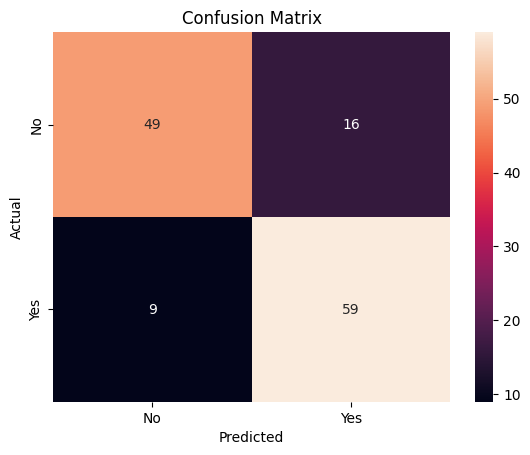

In [65]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
ax = plt.subplot()
sns.heatmap(cm, annot = True, ax = ax) # annot = True, to annotate cells

ax.set_xlabel('Predicted')
ax.set_ylabel('Actual')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(['No', 'Yes'])
ax.yaxis.set_ticklabels(['No', 'Yes'])

In [67]:
import pickle
import joblib
filename = 'loan_model.pkl'
joblib.dump(classifier, filename)

['loan_model.pkl']

In [69]:
mdl = joblib.load('loan_model.pkl')

In [ ]:
sc = MinMaxScaler()
test = pd.read_csv("test.csv")
X_test = sc.fit_transform(test)
y_pred = mdl.predict(X_test)
y_pred = (y_pred > 0.58)

In [74]:
ll

總用量 1140
-rw-rw-r-- 1 shumin     388 10月  3 13:43 allcol.pkl
-rw-rw-r-- 1 shumin   37960 10月  2 17:25 bankloan.csv
drwxrwxr-x 4 shumin    4096 10月  3 09:20 DjangoAPI/
-rw-rw-r-- 1 shumin    1069 10月  2 17:14 LICENSE
-rw-rw-r-- 1 shumin   44032 10月  3 14:33 loan_model.ipynb
-rw-rw-r-- 1 shumin 1058166 10月  2 18:09 loan_model.pkl
-rw-rw-r-- 1 shumin      14 10月  2 17:14 README.md
-rw-rw-r-- 1 shumin    1260 10月  3 13:44 scalers.pkl


In [75]:
joblib.dump(sc, "scalers.pkl")

['scalers.pkl']

In [ ]:
val = pd.DataFrame(y_pred, columns = ['Status'])
val = val.replace({True: 'Approved', False: 'Rejected'})
